In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score

In [ ]:
df = pd.read_csv("/content/sample_data/heart_2020_cleaned.csv")

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
df.shape

(319795, 18)

In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df.isna().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity',
       'Asthma', 'KidneyDisease', 'SkinCancer']

In [ ]:
for col in cols:
    print(df[col].value_counts())

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64
Smoking
No     187887
Yes    131908
Name: count, dtype: int64
AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64
Stroke
No     307726
Yes     12069
Name: count, dtype: int64
DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64
Sex
Female    167805
Male      151990
Name: count, dtype: int64
PhysicalActivity
Yes    247957
No      71838
Name: count, dtype: int64
Asthma
No     276923
Yes     42872
Name: count, dtype: int64
KidneyDisease
No     308016
Yes     11779
Name: count, dtype: int64
SkinCancer
No     289976
Yes     29819
Name: count, dtype: int64


## Use LabelEncoder for columns that have "yes" and "no" as values, this converts "No" to 0 and "Yes" to 1

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[[col]])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [ ]:
df['Diabetic'].value_counts()

,count
Diabetic,
No,269653
Yes,40802
"No, borderline diabetes",6781
Yes (during pregnancy),2559


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [ ]:
df['Race'].value_counts()

,count
Race,
White,245212
Hispanic,27446
Black,22939
Other,10928
Asian,8068
American Indian/Alaskan Native,5202


In [ ]:
df["GenHealth"].value_counts()

,count
GenHealth,
Very good,113858
Good,93129
Excellent,66842
Fair,34677
Poor,11289


## Use Ordinal Encoder for "GenHealth" column because the values in this column can be ranked or have an order
### 0 = Poor, 1 = Fair, 2 = Excellent, 3 = Good, 4 = "Very Good"

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

rating = ['Poor', 'Fair', "Excellent", "Good", "Very good"]
ordinal_encoder = OrdinalEncoder(categories=[rating])
df["GenHealth"] = ordinal_encoder.fit_transform(df[['GenHealth']])
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,4.0,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,4.0,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,1.0,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,3.0,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,No,1,4.0,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,Yes,0,1.0,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,No,1,4.0,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,No,1,3.0,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,No,0,3.0,12.0,0,0,0


## Apply one-hot encoding (dummy variables) to all remaining categorical features, as they are nominal and contain more than two distinct categories.

In [ ]:
import pandas as pd

# Applying one-hot encoding
df = pd.get_dummies(df,columns=['AgeCategory', 'Race', 'Diabetic'], drop_first=True,dtype=int)

# Displaying the encoded DataFrame
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,...,AgeCategory_75-79,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'AgeCategory_25-29', 'AgeCategory_30-34',
       'AgeCategory_35-39', 'AgeCategory_40-44', 'AgeCategory_45-49',
       'AgeCategory_50-54', 'AgeCategory_55-59', 'AgeCategory_60-64',
       'AgeCategory_65-69', 'AgeCategory_70-74', 'AgeCategory_75-79',
       'AgeCategory_80 or older', 'Race_Asian', 'Race_Black', 'Race_Hispanic',
       'Race_Other', 'Race_White', 'Diabetic_No, borderline diabetes',
       'Diabetic_Yes', 'Diabetic_Yes (during pregnancy)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 35 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   HeartDisease                      319795 non-null  int64  
 1   BMI                               319795 non-null  float64
 2   Smoking                           319795 non-null  int64  
 3   AlcoholDrinking                   319795 non-null  int64  
 4   Stroke                            319795 non-null  int64  
 5   PhysicalHealth                    319795 non-null  float64
 6   MentalHealth                      319795 non-null  float64
 7   DiffWalking                       319795 non-null  int64  
 8   Sex                               319795 non-null  int64  
 9   PhysicalActivity                  319795 non-null  int64  
 10  GenHealth                         319795 non-null  float64
 11  SleepTime                         319795 non-null  f

In [ ]:
# df['SkinCancer'] = df['SkinCancer'].map({'No': 0, 'Yes': 1})
# df['KidneyDisease'] = df['KidneyDisease'].map({'No': 0, 'Yes': 1})

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


scaler = StandardScaler()
X = df.drop(columns=['HeartDisease'])
X = scaler.fit_transform(X)

y = df['HeartDisease']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train the model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_sm, y_train_sm)


y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.741693897653184

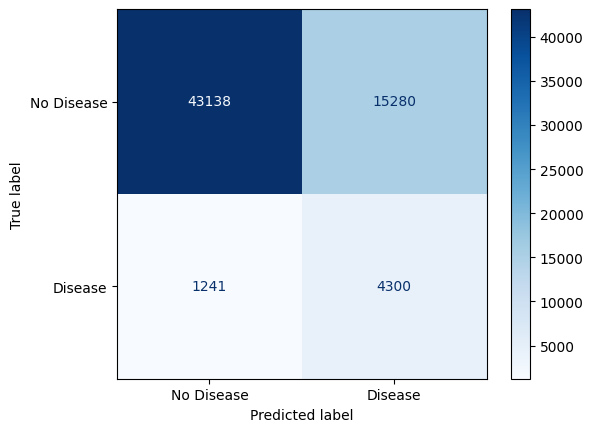

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['No Disease', 'Disease'])
disp.plot(cmap='Blues')


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     58478
           1       0.22      0.77      0.34      5481

    accuracy                           0.74     63959
   macro avg       0.59      0.75      0.59     63959
weighted avg       0.91      0.74      0.80     63959



In [ ]:
response = ['HeartDisease', 'KidneyDisease', 'SkinCancer']


for col in response:
    scaler = StandardScaler()
    X = df.drop(columns=[col])
    X = scaler.fit_transform(X)
    y = df[col]
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    print(col)
    print("")
    accuracy_score(y_test,y_pred)
    print(classification_report(y_test,y_pred))

    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print("")
    print("\033[1m" + "Check for Overfitting:" + "\033[0m")
    print("")
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print("")

HeartDisease

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     58430
           1       0.22      0.76      0.34      5529

    accuracy                           0.74     63959
   macro avg       0.59      0.75      0.59     63959
weighted avg       0.91      0.74      0.80     63959


Check for Overfitting:

Training Accuracy: 0.7443362153879829
Testing Accuracy: 0.744086055129067

KidneyDisease

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     61604
           1       0.10      0.69      0.17      2355

    accuracy                           0.75     63959
   macro avg       0.54      0.72      0.51     63959
weighted avg       0.95      0.75      0.83     63959


Check for Overfitting:

Training Accuracy: 0.7544872496443034
Testing Accuracy: 0.7515126878156319

SkinCancer

              precision    recall  f1-score   support

           0       0.97      0.64      0.77     5

### AUC/ROC curve


HeartDisease

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     58508
           1       0.22      0.76      0.34      5451

    accuracy                           0.74     63959
   macro avg       0.59      0.75      0.59     63959
weighted avg       0.91      0.74      0.80     63959


Check for Overfitting:

Training Accuracy: 0.7433629356306384
Testing Accuracy: 0.7448678059381791

AUC: 0.8322


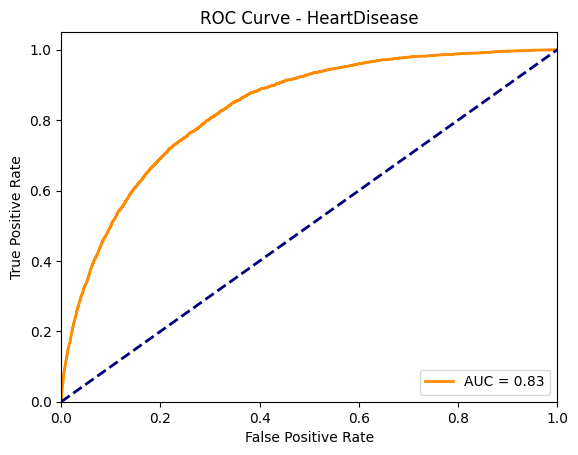


KidneyDisease

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     61614
           1       0.10      0.69      0.17      2345

    accuracy                           0.75     63959
   macro avg       0.54      0.72      0.51     63959
weighted avg       0.95      0.75      0.83     63959


Check for Overfitting:

Training Accuracy: 0.7539439328319705
Testing Accuracy: 0.7506683969417909

AUC: 0.7920


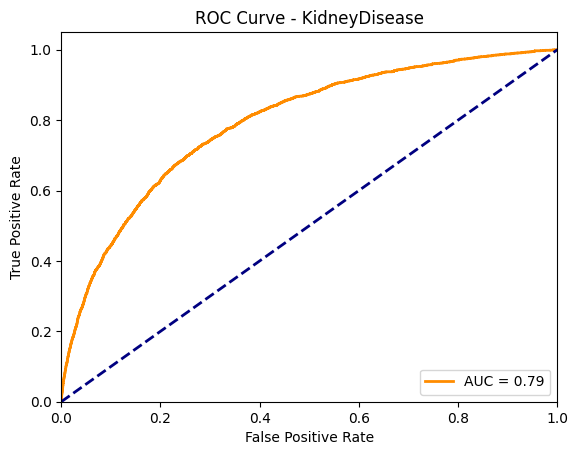


SkinCancer

              precision    recall  f1-score   support

           0       0.97      0.64      0.77     58148
           1       0.18      0.81      0.30      5811

    accuracy                           0.66     63959
   macro avg       0.58      0.73      0.54     63959
weighted avg       0.90      0.66      0.73     63959


Check for Overfitting:

Training Accuracy: 0.6599423067902875
Testing Accuracy: 0.6579058459325505

AUC: 0.7948


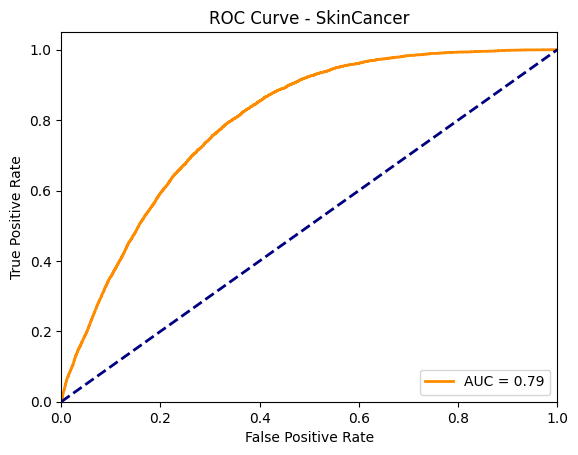

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

response = ['HeartDisease', 'KidneyDisease', 'SkinCancer']

for col in response:
    scaler = StandardScaler()
    X = df.drop(columns=[col])
    X = scaler.fit_transform(X)
    y = df[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = LogisticRegression(class_weight='balanced')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_logistic = model.decision_function(X_test) # get probabilities for class 1

    print("\n\033[1m" + col + "\033[0m")
    print("")
    print(classification_report(y_test, y_pred))

    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print("")
    print("\033[1m" + "Check for Overfitting:" + "\033[0m")
    print("")
    print("Training Accuracy:", train_accuracy)
    print("Testing Accuracy:", test_accuracy)
    print("")

    # --- ROC Curve and AUC ---
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_logistic)
    roc_auc = auc(fpr,tpr)
    print("\033[1m" + f"AUC: {roc_auc:.4f}" + "\033[0m")

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {col}')
    plt.legend(loc="lower right")
    plt.show()


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier(class_weight='balanced')

In [ ]:
dc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
X3 = df.drop(columns=['HeartDisease'])
y3 = df['HeartDisease']

In [ ]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y3, test_size = 0.2)

In [ ]:
dc.fit(X_train3,y_train3)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
y_pred3 = dc.predict(X_test3)

In [ ]:
print(confusion_matrix(y_test3,y_pred3))

[[54061  4404]
 [ 4228  1266]]


In [ ]:
print(classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     58465
           1       0.22      0.23      0.23      5494

    accuracy                           0.87     63959
   macro avg       0.58      0.58      0.58     63959
weighted avg       0.87      0.87      0.87     63959



In [ ]:
dc.feature_importances_

array([0.28608924, 0.01851484, 0.01021436, 0.01979206, 0.05011351,
       0.05264305, 0.01452247, 0.02471348, 0.02288912, 0.13500367,
       0.08178223, 0.01708777, 0.00956184, 0.01663616, 0.00202087,
       0.00253709, 0.00288412, 0.00367589, 0.00264204, 0.00567613,
       0.00883733, 0.01605563, 0.02079213, 0.02680407, 0.02728533,
       0.03869462, 0.0025834 , 0.00736209, 0.00723468, 0.00481081,
       0.01168837, 0.00611164, 0.04135906, 0.00138091])

In [ ]:
print(f'Tree depth:', dc.get_depth())
print(f'Number of leaves:', dc.get_n_leaves())

Tree depth: 55
Number of leaves: 39721


### Check for Overfitting

In [ ]:
train_accuracy = dc.score(X_train3, y_train3)
test_accuracy = dc.score(X_test3, y_test3)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.994852170921997
Testing Accuracy: 0.8650385403148892


## Adjusting alpha in order to address overfitting (pruning)

In [ ]:
dc = DecisionTreeClassifier(ccp_alpha=0.04,class_weight='balanced')
dc.fit(X_train3,y_train3)
y_pred3 = dc.predict(X_test3)
print(confusion_matrix(y_test3,y_pred3))
print(classification_report(y_test3,y_pred3))

[[51622  6843]
 [ 3328  2166]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     58465
           1       0.24      0.39      0.30      5494

    accuracy                           0.84     63959
   macro avg       0.59      0.64      0.60     63959
weighted avg       0.88      0.84      0.86     63959



In [ ]:
print(f'Tree depth:', dc.get_depth())
print(f'Number of leaves:', dc.get_n_leaves())

Tree depth: 1
Number of leaves: 2


In [ ]:
train_accuracy = dc.score(X_train3, y_train3)
test_accuracy = dc.score(X_test3, y_test3)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.838568457918354
Testing Accuracy: 0.8409762504104191


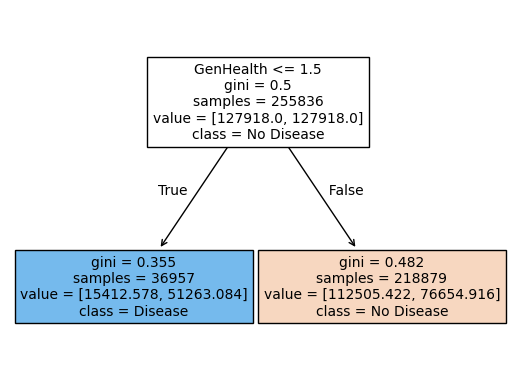

In [ ]:
from sklearn import tree

feature_names = df.drop(columns=['HeartDisease']).columns
_ = tree.plot_tree(dc,feature_names = feature_names, class_names = {0: "No Disease", 1: "Disease"}, filled = True)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Scale features (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train_res, y_train_res)

# Evaluate on test set
y_pred = clf.predict(X_test)


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[75952 11082]
 [ 6548  2357]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.90     87034
           1       0.18      0.26      0.21      8905

    accuracy                           0.82     95939
   macro avg       0.55      0.57      0.55     95939
weighted avg       0.85      0.82      0.83     95939



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X2 = df.drop(columns=['KidneyDisease'])
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)
y2 = df['KidneyDisease']

In [ ]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2, test_size = 0.3)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create a KNN classifier (you can tune n_neighbors)
knn = KNeighborsClassifier(n_neighbors=309,n_jobs=-1)

# Train the model
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9632889820040964
Confusion Matrix:
 [[61611     0]
 [ 2348     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     61611
           1       0.00      0.00      0.00      2348

    accuracy                           0.96     63959
   macro avg       0.48      0.50      0.49     63959
weighted avg       0.93      0.96      0.95     63959



C:\Users\omair\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\omair\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\omair\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 309,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
import math
math.sqrt(len(y_test2))

309.7402137275688